In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_bokeh

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [2]:
#Dataextraction:
df = pd.read_excel(r'C:\Users\eshap\OneDrive\Desktop\MA_restaurant_dataset.xlsx')
print(df)

                               Name  \
0                Kashmir on Newbury   
1                     Punjabi Dhaba   
2                            Punjab   
3                     Punjab Palace   
4            Tanjore Indian Cuisine   
5                 The Kebab Factory   
6          India Quality Restaurant   
7                     Ritu Ki Rasoi   
8                       Punjab Café   
9                        Masala Art   
10                 Guru the Caterer   
11                         Godavari   
12           Minerva Indian Cuisine   
13                    Welcome India   
14                     Singh's Cafe   
15                      Dosa Temple   
16                       Desi Dhaba   
17                      Mehak Halal   
18                        Spice Box   
19             Halal Indian Cuisine   
20                       Hot Breads   
21                     Kabab Corner   
22                    Sher-A-Punjab   
23                 Harvest of India   
24                      J

In [3]:
df.head()

,Name,Address,Town,Phone number,Delivery/Takeout,Working Hours,Comments,Rating out of 5
0,Kashmir on Newbury,"279 Newbury St Boston, MA 02116",Boston,617 536-1695,Both,11am-10pm,"apps to deliver- grub hub, uber eats, doordash",4.0
1,Punjabi Dhaba,"225 Hampshire St Cambridge, MA 02139",Cambridge,(617) 547-8272,Both,12pm-10:30pm,Uber eats,4.0
2,Punjab,"485 Massachusetts Ave, Arlington, MA 02474",Arlington,(781) 643-0943,Both,11:30am-10pm,"their own delivery , uber eats, grub hub",4.4
3,Punjab Palace,"109 Brighton Ave, Boston, MA 02134",Boston,(617) 254-1500,Both,11:30am -11pm,"grub hub, uber eats, doordash and their own de...",4.0
4,Tanjore Indian Cuisine,"18 Eliot St, Cambridge, MA 02138",Cambridge,(617) 868-1900,Both,"11:30am-3pm, 5:00pm-10pm",$2 delivery under 2 mile,4.0


In [4]:
df.tail()

,Name,Address,Town,Phone number,Delivery/Takeout,Working Hours,Comments,Rating out of 5
47,Maya Indian Bar and Grill,"33 Turtle St. Wakefield, MA 01880",Wakefield,(781) 587-2123,Both,4:30pm-9:00pm,"InHouse Ordering with Delivery, Grubhub, UberE...",4.4
48,Holi Indian Restaurant and Bar,"20 North Road Bedford, MA 01730",Bedford,(781) 538.5906,Both,3:00pm-9:00pm,"Grubhub, own free delivery",4.2
49,Street Kitchen,"132 Main Street, Malbarough MA 01752",Malbarough,(508) 251.1914,Both,4:00pm-9:00pm,"Doordash, Grubhub, Uber eats, Seamless, Caviar...",4.1
50,Pizza and Sub Stop,"5 Merrimack St, Lowell, MA 01852",Lowell,(978) 656-0009,Both,11am-8-45pm (Monday- Saturday),"Grubhub, Menufy, UberEats",4.4
51,Mitho Restaurant,"831 Main Street,Winchester,MA 01890",Winchester,(781) 369-1477,Both,"Monday : 4 PM – 5 PM, Tuesday-Thursday:11am-5p...","Free Delivery within 2 Miles, minimum order $35",4.7


In [5]:
#Data cleaning:

In [6]:
df.shape

(52, 8)

In [7]:
df.isnull().sum()

Name                0
Address             0
Town                0
Phone number        0
Delivery/Takeout    0
Working  Hours      0
Comments            0
Rating out of 5     0
dtype: int64

In [8]:
correlation_df = df.copy()
correlation_df.head()

,Name,Address,Town,Phone number,Delivery/Takeout,Working Hours,Comments,Rating out of 5
0,Kashmir on Newbury,"279 Newbury St Boston, MA 02116",Boston,617 536-1695,Both,11am-10pm,"apps to deliver- grub hub, uber eats, doordash",4.0
1,Punjabi Dhaba,"225 Hampshire St Cambridge, MA 02139",Cambridge,(617) 547-8272,Both,12pm-10:30pm,Uber eats,4.0
2,Punjab,"485 Massachusetts Ave, Arlington, MA 02474",Arlington,(781) 643-0943,Both,11:30am-10pm,"their own delivery , uber eats, grub hub",4.4
3,Punjab Palace,"109 Brighton Ave, Boston, MA 02134",Boston,(617) 254-1500,Both,11:30am -11pm,"grub hub, uber eats, doordash and their own de...",4.0
4,Tanjore Indian Cuisine,"18 Eliot St, Cambridge, MA 02138",Cambridge,(617) 868-1900,Both,"11:30am-3pm, 5:00pm-10pm",$2 delivery under 2 mile,4.0


In [9]:
df.isnull().sum()

Name                0
Address             0
Town                0
Phone number        0
Delivery/Takeout    0
Working  Hours      0
Comments            0
Rating out of 5     0
dtype: int64

In [10]:
#Coorrelation matrix:
correlation_df.head()

,Name,Address,Town,Phone number,Delivery/Takeout,Working Hours,Comments,Rating out of 5
0,Kashmir on Newbury,"279 Newbury St Boston, MA 02116",Boston,617 536-1695,Both,11am-10pm,"apps to deliver- grub hub, uber eats, doordash",4.0
1,Punjabi Dhaba,"225 Hampshire St Cambridge, MA 02139",Cambridge,(617) 547-8272,Both,12pm-10:30pm,Uber eats,4.0
2,Punjab,"485 Massachusetts Ave, Arlington, MA 02474",Arlington,(781) 643-0943,Both,11:30am-10pm,"their own delivery , uber eats, grub hub",4.4
3,Punjab Palace,"109 Brighton Ave, Boston, MA 02134",Boston,(617) 254-1500,Both,11:30am -11pm,"grub hub, uber eats, doordash and their own de...",4.0
4,Tanjore Indian Cuisine,"18 Eliot St, Cambridge, MA 02138",Cambridge,(617) 868-1900,Both,"11:30am-3pm, 5:00pm-10pm",$2 delivery under 2 mile,4.0


Index(['Name', 'Address', 'Town', 'Phone number ', 'Delivery/Takeout',
       'Working  Hours', 'Comments', 'Rating out of 5'],
      dtype='object')

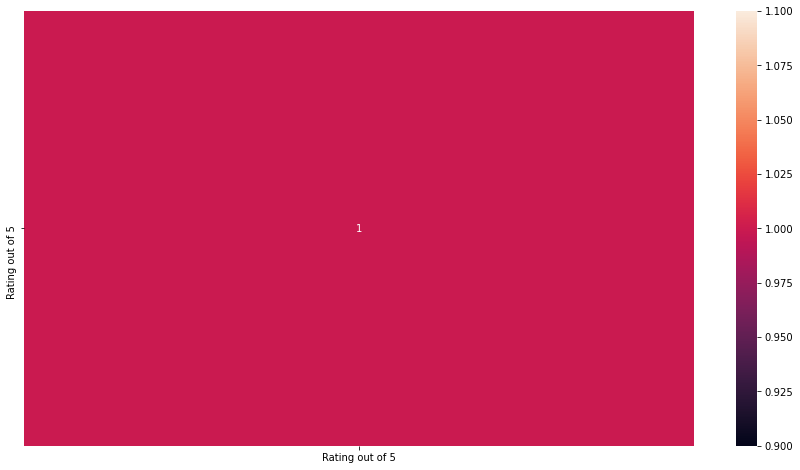

In [11]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

C:\Users\eshap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eshap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eshap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location wise count for restaurants')

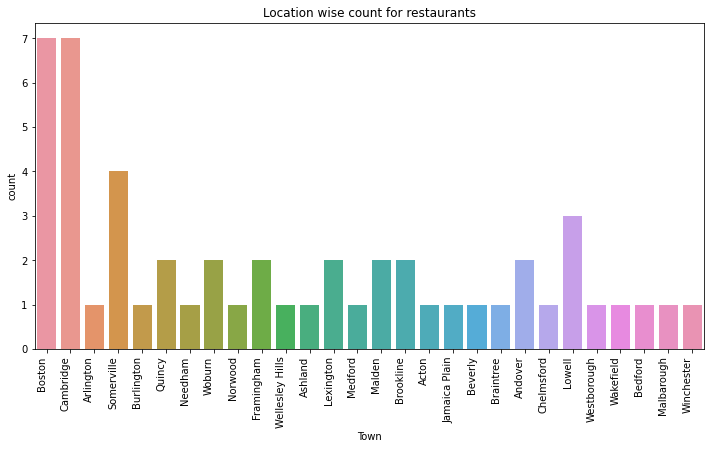

In [12]:
sns.countplot(df['Town'])
sns.countplot(df['Town']).set_xticklabels(sns.countplot(df['Town']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('Location wise count for restaurants')

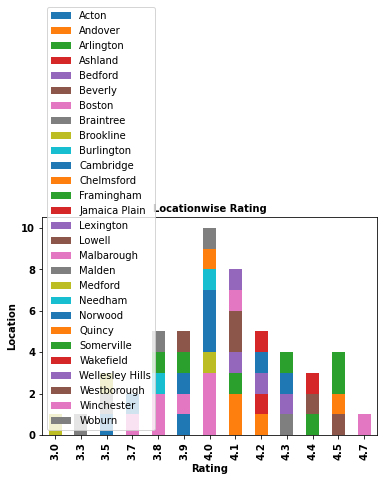

In [13]:
loc_plt=pd.crosstab(df['Rating out of 5'],df['Town'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=10,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend()

Text(0.5, 1.0, 'NO. of restaurants in a Location')

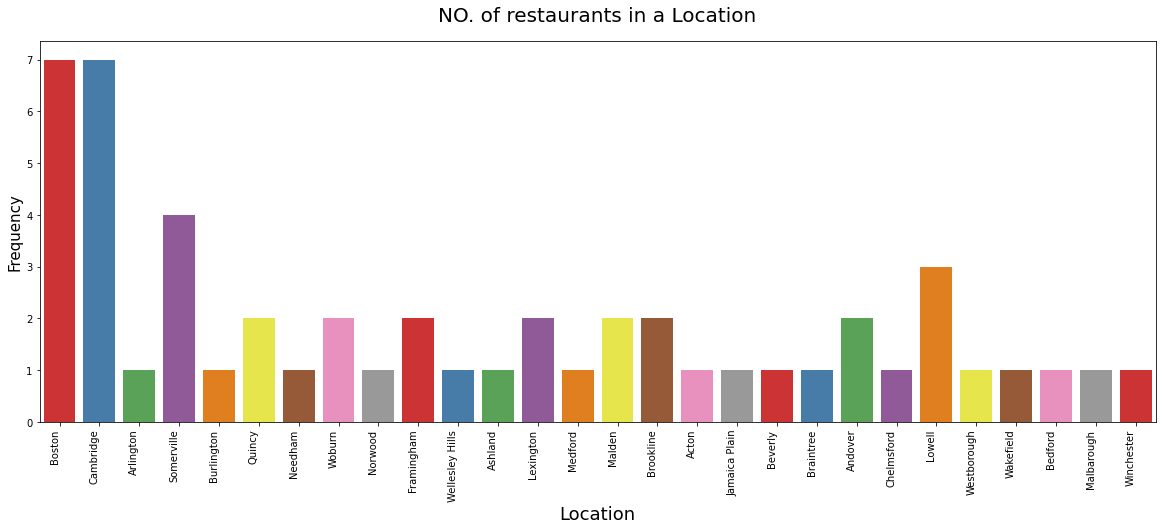

In [14]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="Town",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 0, 'Number of outlets')

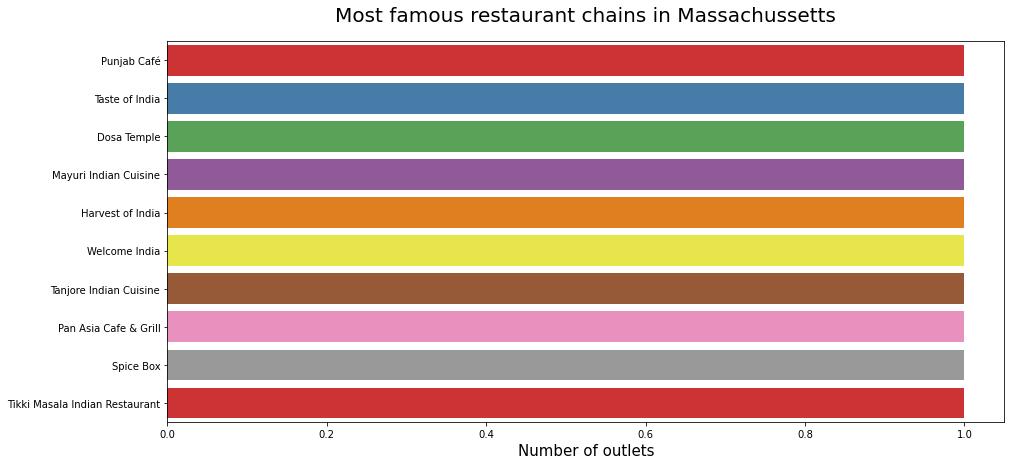

In [15]:
plt.figure(figsize=(15,7))
chains=df['Name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Massachussetts",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)